# Assignment 2

## Part 1: Synthetic dataset

**Question 1** Start by generating a 2D dataset that has 3 Gaussian clusters. The first two should be as in the cluster creation exercise from class, i.e., cluster 1 should be centred at (10,10) and be spherical and cluster 2 should be centred at (0,0) and have contours in the shape of an ellipse (with a radius ratio of roughly 4:1), while the third cluster can be whatever you'd like as long as it is distinct from the first two but still has some overlap with one of them. Include a 1000 datapoints for each cluster.

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Variables

In [2]:
datapoints = 1000
cluster1Center = 10
cluster2Center = 0
division = 1

Cluster 1: Spherical Gaussian Cluster with center at (10,10)

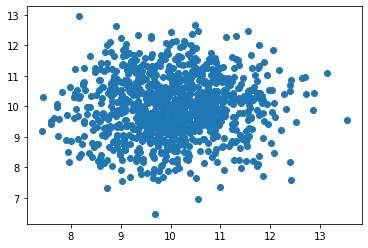

In [3]:
cluster1 = np.random.normal(cluster1Center,division,(datapoints,2))
plt.scatter(cluster1[:,0],cluster1[:,1])

Cluster 2: Ellipse Gaussian Cluster with center at (0,0) and radius ration roughly 4:1

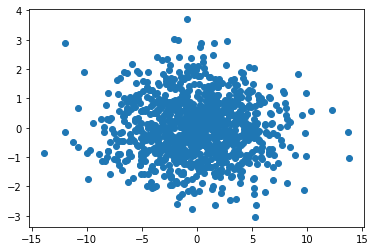

In [4]:
cluster2 = np.random.normal(cluster2Center,division,(datapoints,2))
cluster2[:,0]=cluster2[:,0]*4
plt.scatter(cluster2[:,0],cluster2[:,1])

Cluster 3: Circle Gaussian Cluster with radius 5 and center at (0,0)

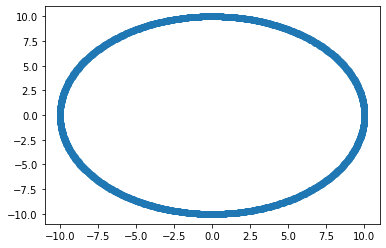

In [5]:
angle = np.linspace(0, 2*np.pi, datapoints)
cx, cy = (0, 0)
x = cx + 10*np.cos(angle)
y = cy + 10*np.sin(angle)
cluster3 = np.array(list(zip(x,y)))
plt.scatter(cluster3[:,0],cluster3[:,1])

Three Gaussian Cluster combined

In [6]:
cluster=np.concatenate((cluster1,cluster2,cluster3))

**Question 2** Produce a scatter plot of your clusters, assigning each cluster a different color.

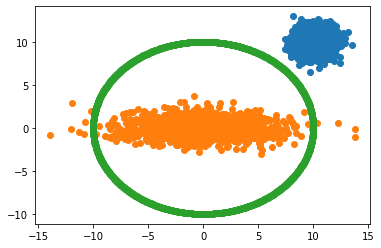

In [7]:
plt.scatter(cluster1[:,0],cluster1[:,1])
plt.scatter(cluster2[:,0],cluster2[:,1])
plt.scatter(cluster3[:,0],cluster3[:,1])

## Part 2: Clustering

Suppose you didn't know to which cluster each datapoint belonged to, and wanted to find out. One of the first things you might try is the following algorithm, where $k$ is a hyperparameters controlling the number of clusters we're trying to find:

1. Initialize the k cluster centroids, $\mu_1, \mu_2, \ldots, \mu_k$, randomly.
2. Repeat until convergence **(Question 1: what should the convergence criterion be?)**:
    1. Assign each datapoint to the cluster with the nearest centroid;
    2. Re-calculate the cluster centroids, i.e. the mean of all datapoints assigned to each cluster

**Convergence criteria: When the centroids in the k-means remain at the same place and don't move further, i.e., the data points are placed in the correct clusters**

**Question 2**: Implement this in Python. Define a Python class $\it{clustering}$, that takes as initialization parameters $\it{n_{clusters}}$, the number of clusters, $\it{n_{iter}}$, the maximum number of iterations of the above algorithm, and any other parameters you feel are needed to check for convergence (if any). The cluster centroids should be a class attribute. Define two methods, $\it{fit}$, taking in a set of points, $\mathbf{X}$ and performing clustering using the algorithm above,  and $\it{predict}$, that takes in a set of points and returns a prediction for which cluster those points belong to.

In [8]:
import math
class clustering:
   
    def __init__(self, clustersN, iterations, convergence):
        self.clustersN = clustersN  
        self.iterations = iterations 
        self.convergence = convergence     
    
    def fit(self,X):               
        self.clusterCentroids = {}

        for i in range(self.clustersN):
            self.clusterCentroids[i] = X[i]            
        for i in range(self.iterations):           
            self.cluster = {}            
            for j in range(self.clustersN):
                self.cluster[j] = []           
            for x in X:
                distances = []
                for c in self.clusterCentroids:                     
                    distances.append(math.sqrt((x[0]-self.clusterCentroids[c][0])**2 + (x[1]-self.clusterCentroids[c][1])**2))         
                c_index = distances.index(min(distances))
                self.cluster[c_index].append(x)
                
            lastClusterCentroids = dict(self.clusterCentroids)
            for cluster_index in self.cluster:
                self.clusterCentroids[cluster_index] = np.average(self.cluster[cluster_index], axis = 0)
                
            convergenceBoolean = True
            for c in self.clusterCentroids:
                centroidValue = lastClusterCentroids[c]
                centroidValue1 = self.clusterCentroids[c]
                if np.sum((centroidValue1-centroidValue)) > self.convergence:
                    convergenceBoolean = False

            if convergenceBoolean == True:
                break
                
    def predict(self,X):
        distances = [np.linalg.norm(X-self.clusterCentroids[centroid]) for centroid in self.clusterCentroids]
        classificationPrediction = distances.index(min(distances))
        return classificationPrediction

**Question 3**: Use your clustering class on the synthetic dataset you created in Part 1. Comment on how well it clusters your dataset. 

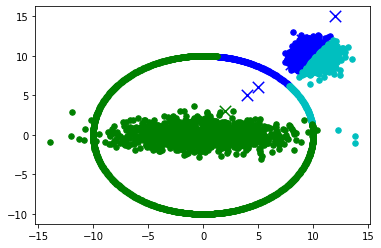

In [9]:
colors = ["b", "c", "g"]
model=clustering(3, 100, 0.001)
model.fit(cluster)

for i in model.clusterCentroids:
    plt.scatter(model.clusterCentroids[i][0], model.clusterCentroids[i][1], s = 130, marker = "x")
for i in model.cluster:
    color = colors[i]
    for j in model.cluster[i]:
        plt.scatter(j[0], j[1], color = color,s = 30)

testDataset = np.array([[5,6], [2,3], [4,5],[8,9],[9,12],[12,15]])

for i in testDataset:
    classificationPrediction = model.predict(i)
    plt.scatter(i[0], i[1], marker="x", color=colors[classificationPrediction], s=130, linewidths=3)

The datapoints clusters well in 3 cluster using k-means algorithm. the performance of the algorithm depends upon the parameters passed. if we increase the cluster to 7 or 10, the algorithm may not well that well.

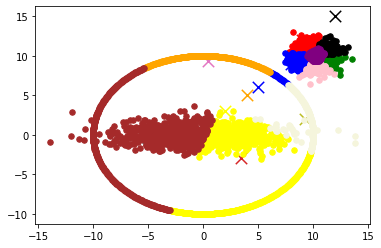

In [10]:
# Increasing the number of clusters and see how well the dataset gets clustered

colors = ["red","green","blue","yellow","pink","black","orange","purple","beige","brown"]
model=clustering(10, 100, 0.001)
model.fit(cluster)

for i in model.clusterCentroids:
    plt.scatter(model.clusterCentroids[i][0], model.clusterCentroids[i][1], s = 130, marker = "x")
for i in model.cluster:
    color = colors[i]
    for j in model.cluster[i]:
        plt.scatter(j[0], j[1], color = color,s = 30)

testDataset = np.array([[5,6], [2,3], [4,5],[8,9],[9,12],[12,15]])

for i in testDataset:
    classificationPrediction = model.predict(i)
    plt.scatter(i[0], i[1], marker="x", color=colors[classificationPrediction], s=130, linewidths=3)

**Question 4**: How do the found clusters vary as you run the algorithm again?

In [11]:
cluster1 = np.random.normal(cluster1Center,division,(datapoints,2))

cluster2 = np.random.normal(cluster2Center,division,(datapoints,2))
cluster2[:,0]=cluster2[:,0]*4

angle = np.linspace(0, 2*np.pi, datapoints)
cx, cy = (0, 0)
x = cx + 10*np.cos(angle)
y = cy + 10*np.sin(angle)
cluster3 = np.array(list(zip(x,y)))

cluster=np.concatenate((cluster1,cluster2,cluster3))

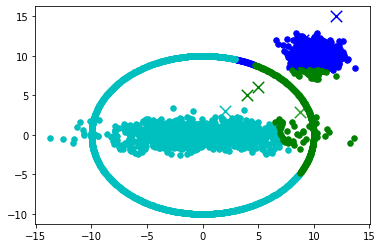

In [12]:
colors = ["b", "c", "g"]
model=clustering(3, 100, 0.001)
model.fit(cluster)

for i in model.clusterCentroids:
    plt.scatter(model.clusterCentroids[i][0], model.clusterCentroids[i][1], s = 130, marker = "x")
for i in model.cluster:
    color = colors[i]
    for j in model.cluster[i]:
        plt.scatter(j[0], j[1], color = color,s = 30)

testDataset = np.array([[5,6], [2,3], [4,5],[8,9],[9,12],[12,15]])

for i in testDataset:
    classificationPrediction = model.predict(i)
    plt.scatter(i[0], i[1], marker="x", color=colors[classificationPrediction], s=130, linewidths=3)

k-means clustering algorithm uses randomized initialization and when we run the algorithm again, the execution starts at different points. In thr last 2 figures above, the datapoints at the boundary only differs in terms of clusters and take different clusters due to randomized initialization of the datapoints.